# Quantum Teleportation 

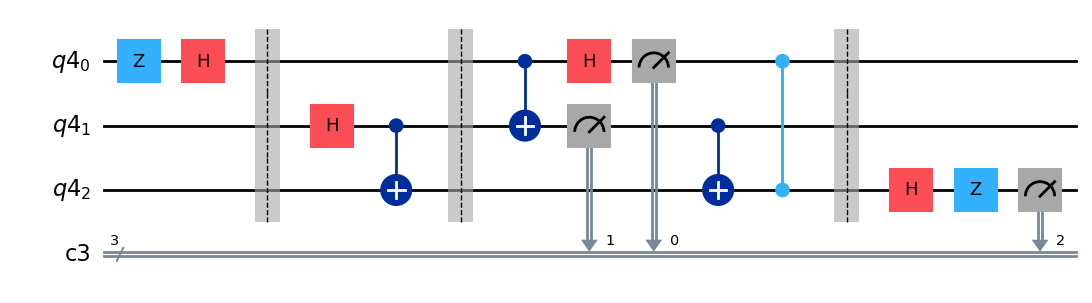

In [38]:
 from qiskit import *
 from qiskit_aer import Aer
 from qiskit_ibm_runtime import QiskitRuntimeService
 from qiskit.visualization import plot_histogram
 secret_unitary = 'hz'
 def apply_secret_unitary(secret_unitary, qubit, quantum_circuit, dagger): 
     functionmap = {
         'x':quantum_circuit.x, 
         'y':quantum_circuit.y, 
         'z':quantum_circuit.z, 
         'h':quantum_circuit.h,                     
         't':quantum_circuit.t,
     } 
     if dagger: functionmap['t'] = quantum_circuit.tdg 
     if dagger: 
         [functionmap[unitary](qubit) for unitary in secret_unitary] 
     else: 
         [functionmap[unitary](qubit) for unitary in secret_unitary[::-1]]

 # Create the quantum circuit
 q = QuantumRegister(3)
 c = ClassicalRegister(3)
 qc = QuantumCircuit(q, c) 

 apply_secret_unitary(secret_unitary, q[0], qc, dagger = 0)
 qc.barrier()
 # Next, generate the entangled pair between Alice and Bob (Remember: Hadamard followed 
 qc.h(q[1])
 qc.cx(q[1], q[2])
 qc.barrier()
 # Next, apply the teleportation protocol. 
 qc.cx(q[0], q[1])
 qc.h(q[0])
 qc.measure(q[0], c[0])
 qc.measure(q[1], c[1])
 qc.cx(q[1], q[2])
 qc.cz(q[0], q[2])
 qc.barrier()
 apply_secret_unitary(secret_unitary, q[2], qc, dagger=1)
 qc.measure(q[2], c[2])
 qc.draw(output='mpl')

{'010': 233, '011': 258, '001': 280, '000': 253}


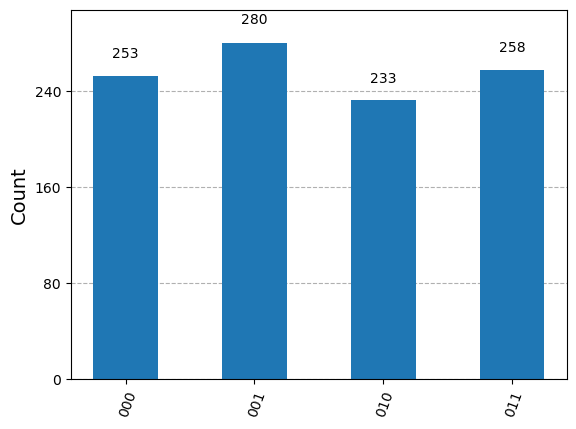

In [20]:
 backend = Aer.get_backend('qasm_simulator')
 job_sim = backend.run(qc,shots=1024)
 sim_result = job_sim.result() 
 
 measurement_result = sim_result.get_counts()
 print(measurement_result)
 plot_histogram(measurement_result)

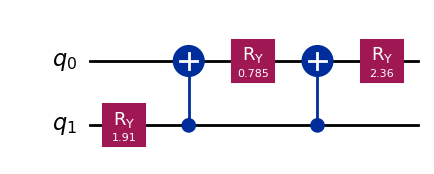

In [22]:
 from qiskit import *
 from qiskit_aer import Aer
 from qiskit.visualization import plot_histogram
 qc_hardy = QuantumCircuit(2)
 qc_hardy.ry(1.911,1)
 qc_hardy.cx(1,0)
 qc_hardy.ry(0.785,0)
 qc_hardy.cx(1,0)
 qc_hardy.ry(2.356,0) 
 
qc_hardy.draw(output='mpl')


Results for two z measurements:


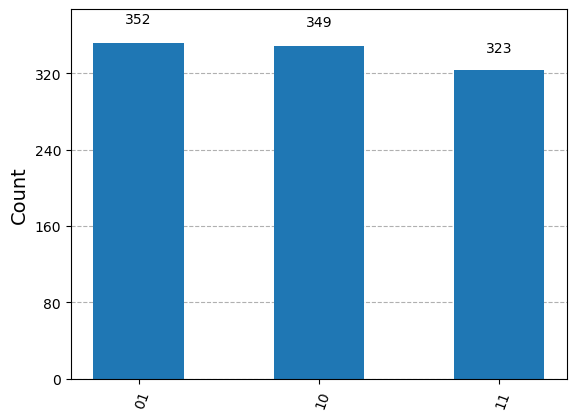

In [24]:
measurements = QuantumCircuit(2,2)
 # z measurement on both qubits
measurements.measure(0,0)
measurements.measure(1,1) 
 
qc = qc_hardy.compose(measurements)
 
print('\nResults for two z measurements:')
counts = Aer.get_backend('qasm_simulator').run(qc).result().get_counts()
plot_histogram(counts)


Results for two x measurements:


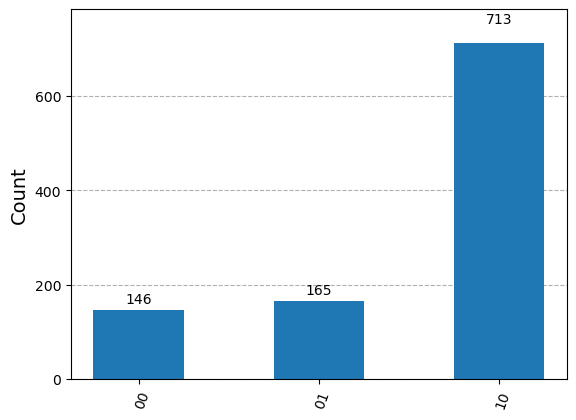

In [26]:
measurements = QuantumCircuit(2,2)
# x measurement on both qubits
measurements.h(0)
measurements.measure(0,0)
measurements.measure(1,1) 
 
qc = qc_hardy.compose(measurements)
 
print('\nResults for two x measurements:')
counts = Aer.get_backend('qasm_simulator').run(qc).result().get_counts()
plot_histogram(counts)